In [8]:
import numpy as np
import plotly.graph_objs as go
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "png"

# 1. Turnover, tiempos antes del despido o renuncia.

## Elegimos la variable _graywage_

In [ ]:
import pandas as pd
from lifelines import KaplanMeierFitter
import plotly.graph_objs as go

df = pd.read_csv('turnover.csv')

kmf = KaplanMeierFitter()

fig = go.Figure()

for name, grouped_df in df.groupby('greywage'):
    kmf.fit(grouped_df['stag'], grouped_df['event'], label=str(name))
    fig.add_trace(
        go.Scatter(
            x=kmf.survival_function_.index,
            y=kmf.survival_function_[kmf._label],
            mode='lines',
            name=str(name)
        )
    )

fig.update_layout(
    title='Kaplan-Meier Curves by Greywage',
    xaxis_title='Time (stag)',
    yaxis_title='Survival Probability',
    legend_title='Greywage'
)

fig.show()



## Vemos que las curvas SÍ parecen ser diferentes, realizamos pruebas estádisticas logrank y peto-peto.

In [6]:
from lifelines.statistics import logrank_test, multivariate_logrank_test

# Preparamos los datos para las pruebas de logrank y Peto-Peto
grupos = df['greywage'].unique()
if len(grupos) > 1:
    # Prueba logrank multivariada (para más de 2 grupos)
    resultados_logrank = multivariate_logrank_test(df['stag'], df['greywage'], df['event'])
    print("Resultados de la prueba Logrank (multivariada):")
    print(resultados_logrank.summary)
    print("\nInterpretación:")
    if resultados_logrank.p_value < 0.05:
        print("Hay una diferencia significativa en los tiempos de permanencia entre al menos dos grupos de 'greywage' (p < 0.05). Esto sugiere que el tipo de salario (gris/blanco) está relacionado con el riesgo de rotación.")
    else:
        print("No hay diferencia significativa en los tiempos de permanencia entre los grupos de 'greywage' (p >= 0.05). El tipo de salario no parece estar relacionado con la rotación en esta muestra.")

    # Prueba Peto-Peto
    resultados_peto = multivariate_logrank_test(df['stag'], df['greywage'], df['event'], weightings='peto')
    print("\nResultados de la prueba Peto-Peto (multivariada):")
    print(resultados_peto.summary)
    print("\nInterpretación:")
    if resultados_peto.p_value < 0.05:
        print("La prueba Peto-Peto también muestra una diferencia significativa entre los grupos de 'greywage' (p < 0.05). Esto refuerza la relación entre el tipo de salario y la rotación.")
    else:
        print("La prueba Peto-Peto no encuentra diferencias significativas entre los grupos (p >= 0.05).")
else:
    print("No hay suficientes grupos en 'greywage' para realizar las pruebas logrank o Peto-Peto.")


Resultados de la prueba Logrank (multivariada):
   test_statistic         p   -log2(p)
0       22.343933  0.000002  18.742965

Interpretación:
Hay una diferencia significativa en los tiempos de permanencia entre al menos dos grupos de 'greywage' (p < 0.05). Esto sugiere que el tipo de salario (gris/blanco) está relacionado con el riesgo de rotación.

Resultados de la prueba Peto-Peto (multivariada):
   test_statistic             p   -log2(p)
0       24.680091  6.767972e-07  20.494773

Interpretación:
La prueba Peto-Peto también muestra una diferencia significativa entre los grupos de 'greywage' (p < 0.05). Esto refuerza la relación entre el tipo de salario y la rotación.


## Ambas pruebas nos dicen que el tipo de salario SÍ está asociado con el riesgo del despido.

## Ahora elegimos la variable categórica "way" que nos dice cómo llegan al trabajo los trabajadores.

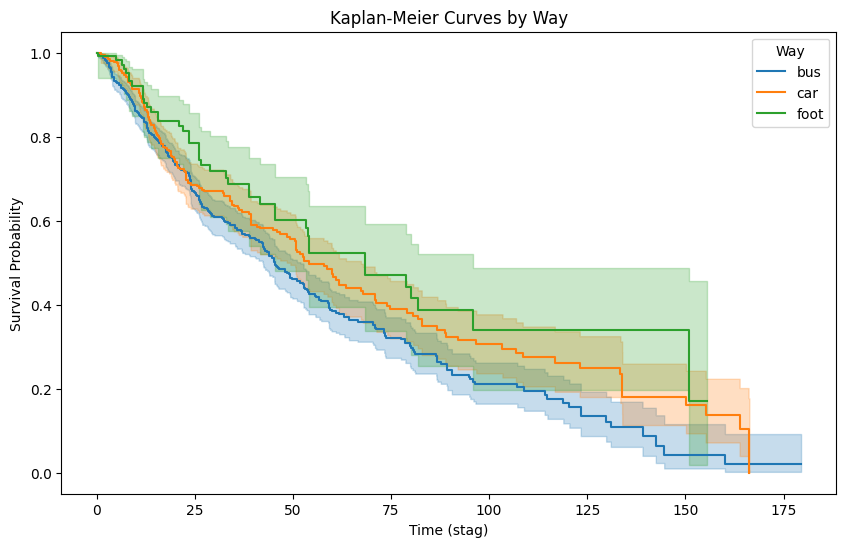

Resultados de la prueba Logrank (multivariada) para 'way':
   test_statistic         p  -log2(p)
0       11.577677  0.003062  8.351529

Interpretación:
Hay una diferencia significativa en los tiempos de permanencia entre al menos dos grupos de 'way' (p < 0.05). Esto sugiere que la forma de salida ('way') está relacionada con el riesgo de rotación.

Resultados de la prueba Peto-Peto (multivariada) para 'way':
   test_statistic        p  -log2(p)
0        8.994447  0.01114  6.488122

Interpretación:
La prueba Peto-Peto también muestra una diferencia significativa entre los grupos de 'way' (p < 0.05). Esto refuerza la relación entre la forma de salida y la rotación.


In [7]:
# Kaplan-Meier curves para la columna categórica "way"
from lifelines import KaplanMeierFitter

import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
plt.figure(figsize=(10, 6))

for name, grouped_df in df.groupby('way'):
    kmf.fit(grouped_df['stag'], grouped_df['event'], label=str(name))
    kmf.plot_survival_function(ci_show=True)

plt.title('Kaplan-Meier Curves by Way')
plt.xlabel('Time (stag)')
plt.ylabel('Survival Probability')
plt.legend(title='Way')
plt.show()

# Pruebas estadísticas logrank y peto-peto para "way"
grupos_way = df['way'].unique()
if len(grupos_way) > 1:
    # Prueba logrank multivariada (para más de 2 grupos)
    resultados_logrank_way = multivariate_logrank_test(df['stag'], df['way'], df['event'])
    print("Resultados de la prueba Logrank (multivariada) para 'way':")
    print(resultados_logrank_way.summary)
    print("\nInterpretación:")
    if resultados_logrank_way.p_value < 0.05:
        print("Hay una diferencia significativa en los tiempos de permanencia entre al menos dos grupos de 'way' (p < 0.05). Esto sugiere que la forma de salida ('way') está relacionada con el riesgo de rotación.")
    else:
        print("No hay diferencia significativa en los tiempos de permanencia entre los grupos de 'way' (p >= 0.05). La forma de salida no parece estar relacionada con la rotación en esta muestra.")

    # Prueba Peto-Peto
    resultados_peto_way = multivariate_logrank_test(df['stag'], df['way'], df['event'], weightings='peto')
    print("\nResultados de la prueba Peto-Peto (multivariada) para 'way':")
    print(resultados_peto_way.summary)
    print("\nInterpretación:")
    if resultados_peto_way.p_value < 0.05:
        print("La prueba Peto-Peto también muestra una diferencia significativa entre los grupos de 'way' (p < 0.05). Esto refuerza la relación entre la forma de salida y la rotación.")
    else:
        print("La prueba Peto-Peto no encuentra diferencias significativas entre los grupos de 'way' (p >= 0.05).")
else:
    print("No hay suficientes grupos en 'way' para realizar las pruebas logrank o Peto-Peto.")


## Ambas pruebas nos dicen que la manera en la que se transportan al trabajo SÍ está asociado con el riesgo del despido.